# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [1]:
import psycopg2
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

hr_dataset = pd.read_sql_query("select * from hr_dataset", conn)
production_staff = pd.read_sql_query("select * from production_staff", conn)
recruiting_costs = pd.read_sql_query("select * from recruiting_costs", conn)
salary_grid = pd.read_sql_query("select * from salary_grid", conn)

In [4]:
# df = hr_dataset.copy().drop(columns=['id'])
# df.loc[:, df.dtypes == 'object'] =\
#     df.select_dtypes(['object'])\
#     .apply(lambda x: x.astype('category').cat.codes)

# df_corr = df.corr()
# fig, ax = plt.subplots(figsize=(100,100))  
# ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True, ax=ax, annot_kws={"size": 40})
# i, k = ax.get_ylim()
# ax.set_ylim(i+0.5, k-0.5) 
# plt.xticks(fontsize=70, rotation=90)
# plt.yticks(fontsize=70, rotation=0)
# plt.show()

#### Рассматривается гипотеза, что Performance score (производительность работника) зависит от менеджера, под которым он устроен.

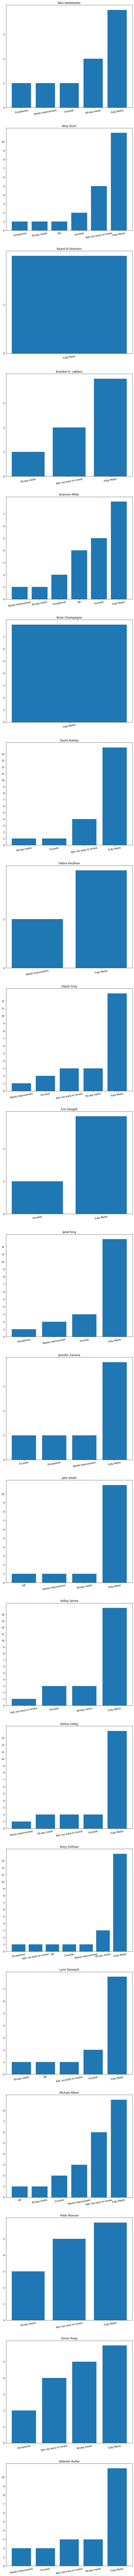

In [161]:
import numpy as np
from matplotlib.ticker import MaxNLocator

df = pd.read_sql_query('SELECT "Manager Name", "Performance Score", COUNT(*) as count FROM hr_dataset GROUP BY "Manager Name",  "Performance Score" ORDER BY count', conn)
grouped = df.groupby('Manager Name')

fig, ax = plt.subplots(len(grouped), 1, figsize=(10, 100))

i = 0
for name, group in grouped:
    ax[i].bar(group['Performance Score'],
            group['count'])
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(10)
        
    ax[i].set_title(name)
    ax[i].set_yticks(range(0, group['count'].max()))
    i += 1
    
plt.subplots_adjust(top=1.7)  
plt.show()

In [58]:
# import collections

# df = hr_dataset.copy()
# df['manager_name_category'] =  hr_dataset['Manager Name'].astype('category').cat.codes
# ax = sns.stripplot(x="perf_scoreid", y="manager_name_category", data=df, jitter=0.2)
# xticks_dict = collections.OrderedDict(sorted(dict(zip(df['perf_scoreid'], df['Performance Score'])).items()))
# xticks_dict = dict(enumerate(list(xticks_dict.values())))
# plt.xticks(list(xticks_dict.keys()), list(xticks_dict.values()), rotation=90)
# yticks_dict = collections.OrderedDict(sorted(dict(zip(df['manager_name_category'], df['Manager Name'])).items()))
# yticks_dict = dict(enumerate(list(yticks_dict.values())))
# plt.yticks(list(yticks_dict.keys()), list(yticks_dict.values()))
# plt.show()

#### Рассматривается гипотеза, что количество дней, которые проработал сотрудник, зависит от его возраста.

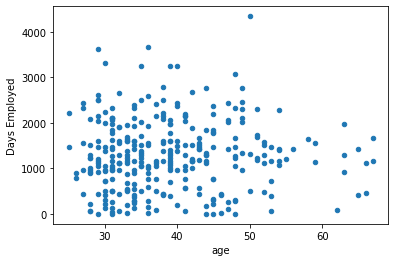

In [170]:
df = hr_dataset.copy()
df.plot.scatter(x='age', y='Days Employed')
plt.show()

#### Рассматривается гипотеза, что количество дней, которые проработал сотрудник, зависит от его семейного положения.

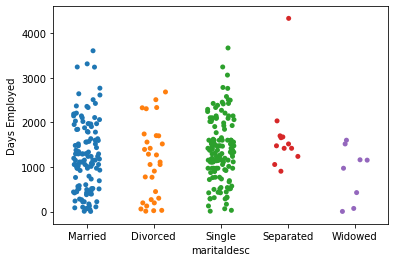

In [179]:
df = pd.read_sql_query('SELECT "Days Employed", maritaldesc FROM hr_dataset', conn)
ax = sns.stripplot(x='maritaldesc', y='Days Employed', data=df, jitter=0.2)
plt.show()

In [180]:
# df = hr_dataset.copy()
# ax = sns.stripplot(x="maritalstatusid", y="Days Employed", data=df, jitter=0.2)
# xticks_dict = collections.OrderedDict(sorted(dict(zip(df['maritalstatusid'], df['maritaldesc'])).items()))
# xticks_dict = dict(enumerate(list(xticks_dict.values())))
# plt.xticks(list(xticks_dict.keys()), list(xticks_dict.values()), rotation=90)
# plt.show()

Отчёт:
Не понятно, что значит 90-day meets и N/A- too early to review, но данные Performance Score выражены у менеджеров под именами:
Webster Butler
Simon Roup
Peter Monroe
Остальные Performance Score у всех выражены одинаково.

Люди всех возрастов в среднем работаю от 1000 до 2000 дней.

Люди с семеныйм статусом Separated работают только в пределах 1000-2000 дней. Меньше всего работают люди со статусом Widowed.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [3]:
import requests
import datetime
import dateutil.relativedelta
from datetime import date
from datetime import datetime, timedelta
import pandas as pd

vk_token = "f5ec2ba27b7c84b04d622168cf78b36c025a3e1437e2bc86c20d1e5b4a16b4a21c884f1bbaa12f4b477a5"

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

month_ago = datetime.combine(date.today() - dateutil.relativedelta.relativedelta(years=1), datetime.min.time())
date_of_last_post = datetime.today()

offset = 1

df =  pd.DataFrame()

while (date_of_last_post > month_ago):
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=' + str(offset) + '&count=100&v=5.92'
    response = getjson(url)
    for item in response['response']['items']:
        date_of_last_post = (datetime.fromtimestamp(item['date']) - timedelta(hours=0))
        df = df.append(pd.DataFrame([[
            date_of_last_post,
            item['post_type'],
            item['text'],
            [x['type'] for x in item['attachments']],
            item['comments']['count'],
            item['likes']['count'],
            item['reposts']['count'],
            item['views']['count']]], columns=['date', 'post_type', 'text', 'attachments_types', 'comments', 'likes', 'reposts', 'views']))
    offset += 100

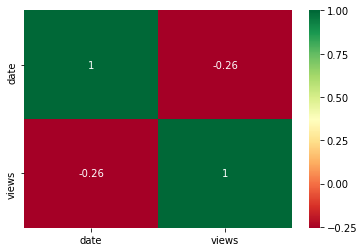

In [4]:
import numpy as np

df_copy = df[['date', 'views']].copy()
df_copy.date = [x.hour for x in df.date]
df_corr = df_copy.corr()
fig, ax = plt.subplots()  
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True, ax=ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.show()

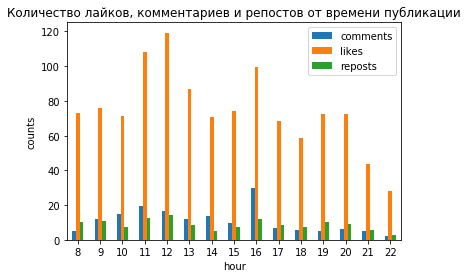

In [5]:
df_copy = df[['date', 'views', 'comments', 'likes', 'reposts']].copy()
df_copy.date = [x.hour for x in df.date]
ax = df_copy.groupby('date')[['comments', 'likes', 'reposts']].mean().plot.bar()
ax.set_xlabel('hour')
ax.set_ylabel('counts')
ax.set_title('Количество лайков, комментариев и репостов от времени публикации')
plt.xticks(rotation=0)
plt.show()

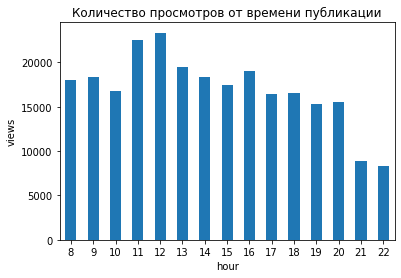

In [6]:
df_copy = df[['date', 'views']].copy()
df_copy.date = [x.hour for x in df.date]
ax = df_copy.groupby('date')['views'].mean().plot.bar()
ax.set_xlabel('hour')
ax.set_ylabel('views')
ax.set_title('Количество просмотров от времени публикации')
plt.xticks(rotation=0)
plt.show()

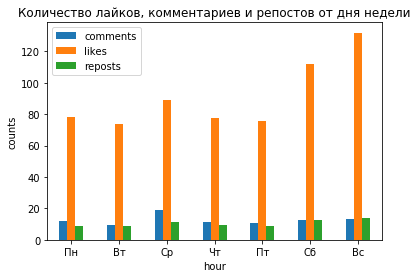

In [7]:
df_copy = df[['date', 'views', 'comments', 'likes', 'reposts']].copy()
df_copy.date = [x.weekday() for x in df.date]
ax = df_copy.groupby('date')[['comments', 'likes', 'reposts']].mean().plot.bar()
ax.set_xlabel('hour')
ax.set_ylabel('counts')
ax.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax.set_title('Количество лайков, комментариев и репостов от дня недели')
plt.xticks(rotation=0)
plt.show()

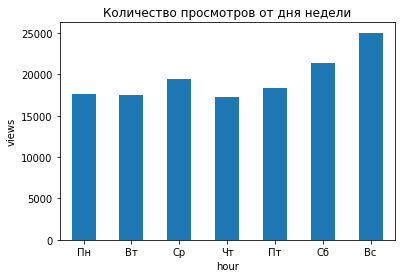

In [8]:
df_copy = df[['date', 'views']].copy()
df_copy.date = [x.weekday() for x in df.date]
ax = df_copy.groupby('date')['views'].mean().plot.bar()
ax.set_xlabel('hour')
ax.set_ylabel('views')
ax.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax.set_title('Количество просмотров от дня недели')
plt.xticks(rotation=0)
plt.show()

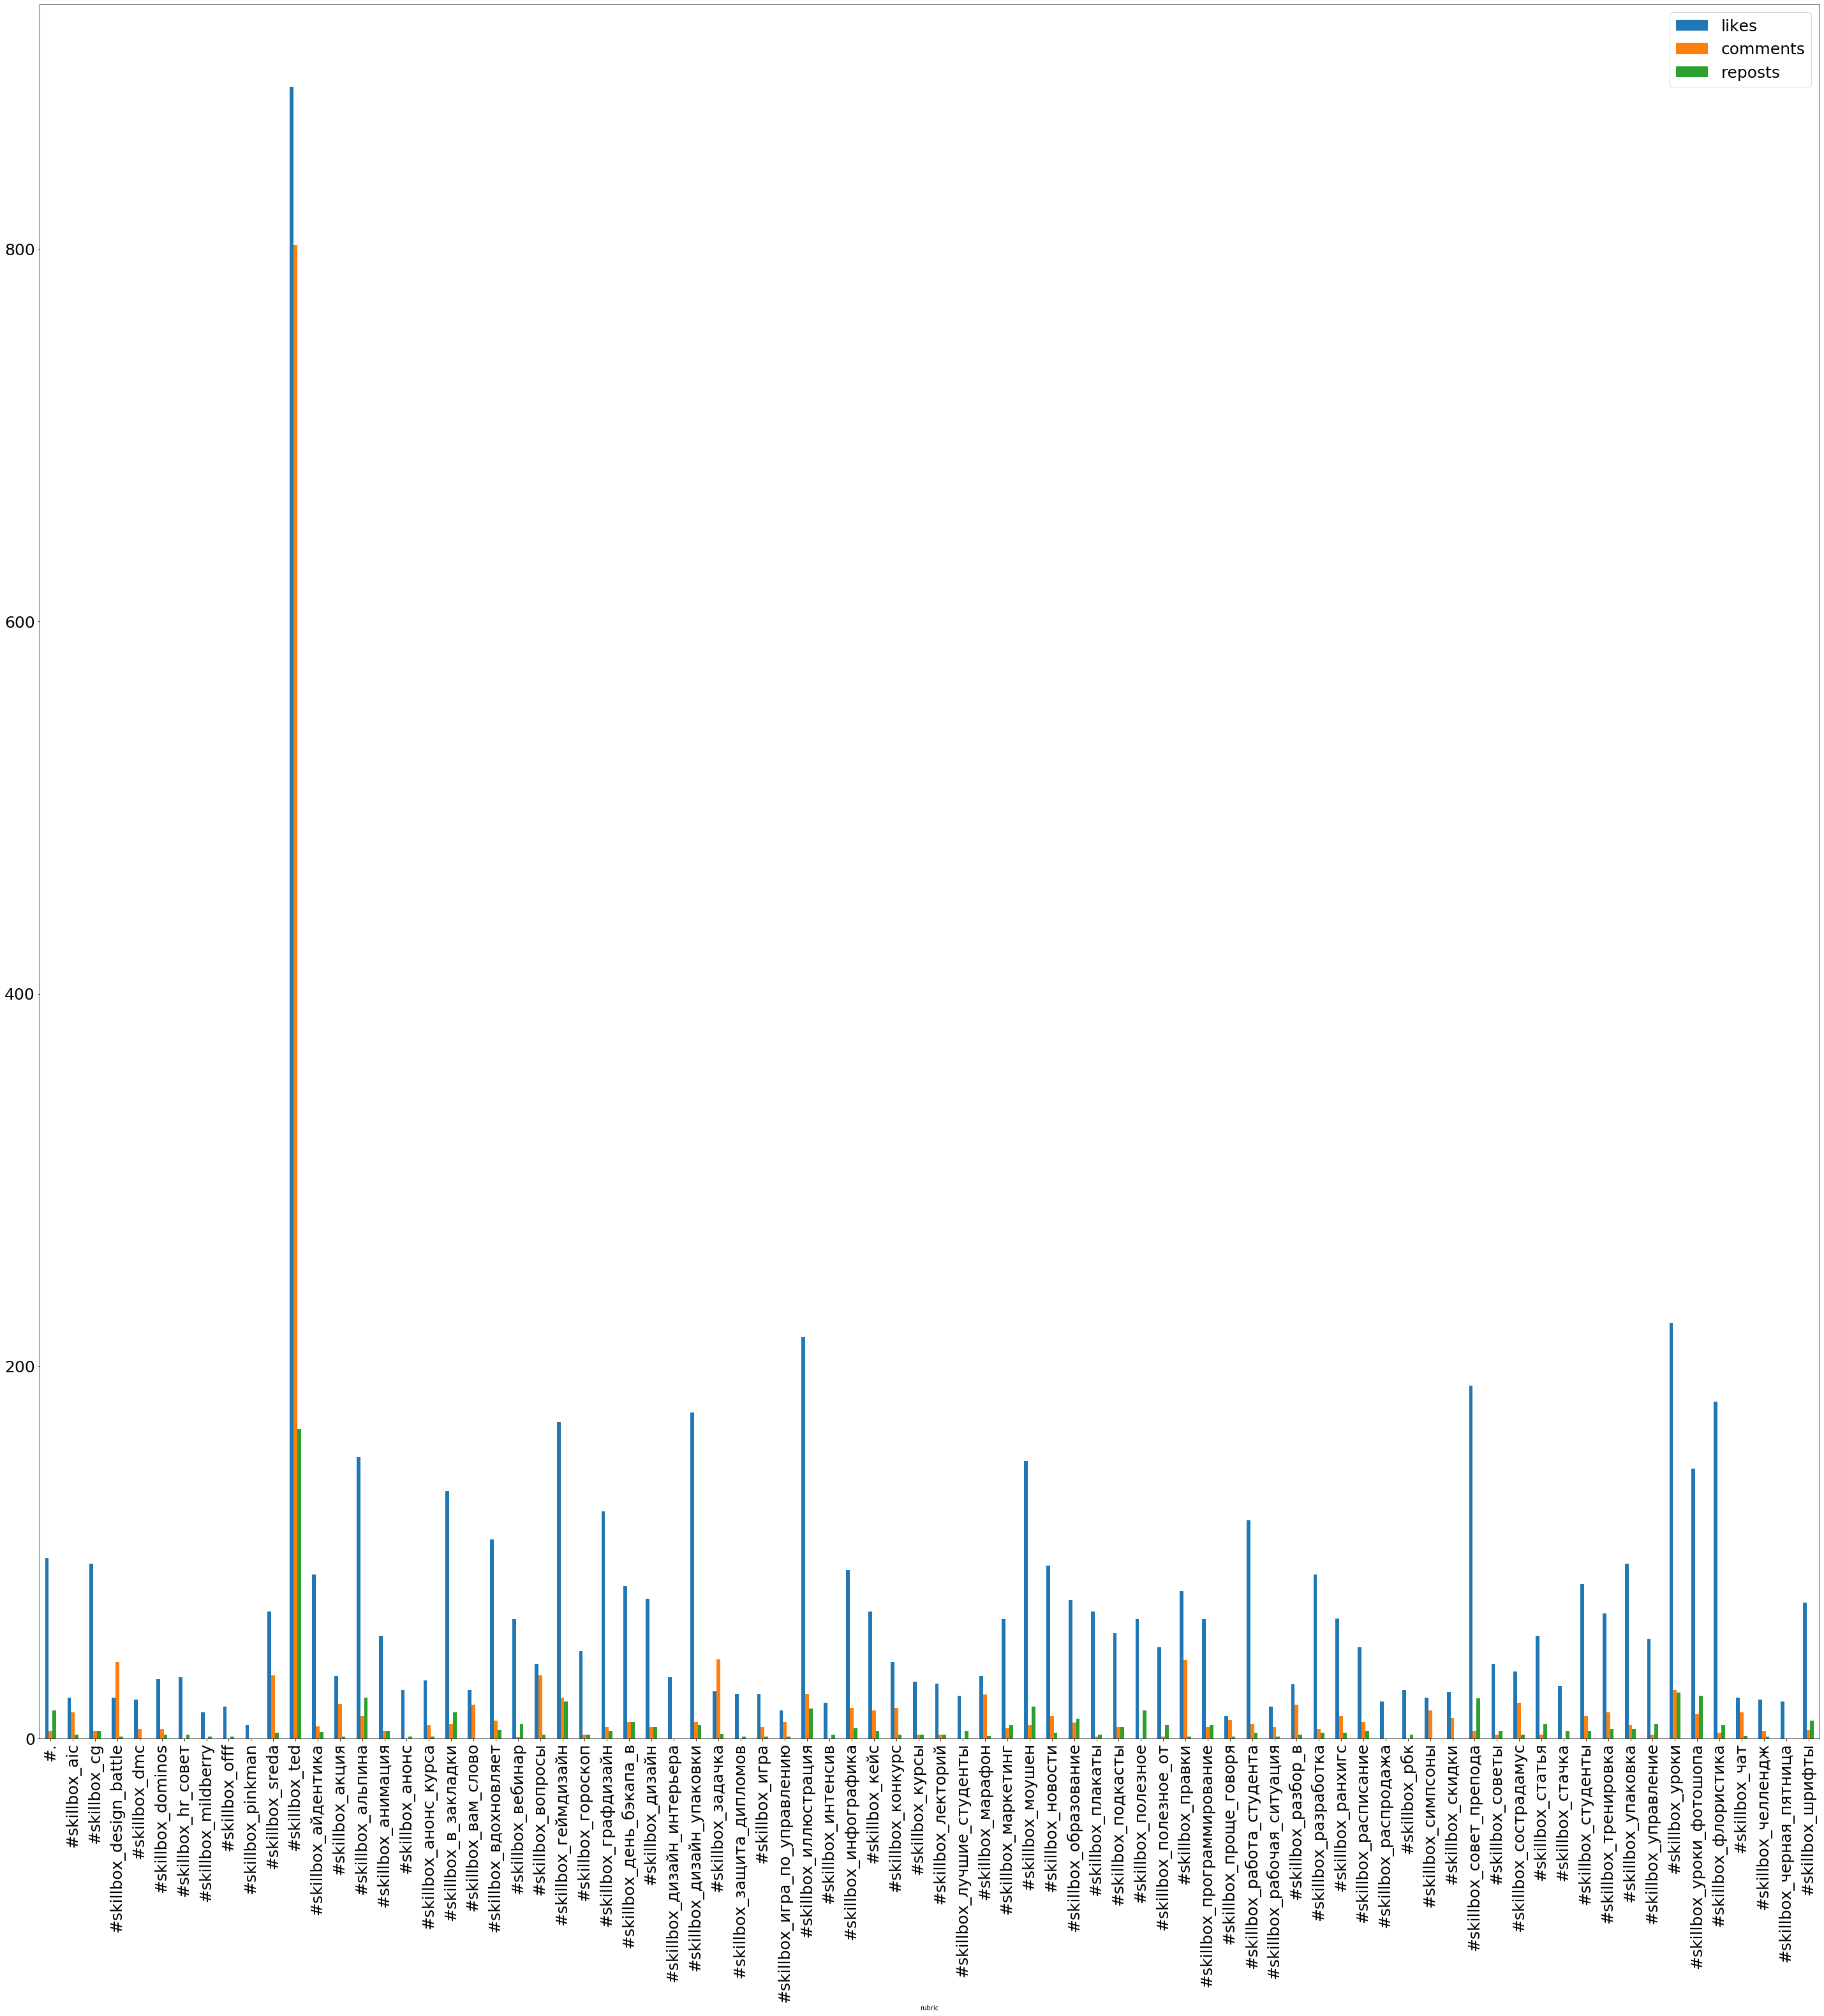

In [80]:
import re

df_rubrics = pd.DataFrame()

for index, row in df.iterrows():
    for x in re.findall(r'#[^ ]+_Skillbox|#Skillbox_[^ ]+', row.text):
        for y in x.split('\n\n'):
            df_rubrics = df_rubrics.append(pd.DataFrame(
                [[y.strip().lower(), row.likes, row.comments, row.reposts]],
                columns=['rubric', 'likes', 'comments', 'reposts']))
            
df_rubrics.rubric = ['#skillbox_' + x.replace("#", "")
                          .replace("_skillbox", "") if '_skillbox' in x else x for x in df_rubrics_copy.rubric]
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_советпрепода', '#skillbox_cовет_препода', '#skillbox_cоветпрепода']), 'rubric'] = '#skillbox_совет_препода'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_взакладки']), 'rubric'] = '#skillbox_в_закладки'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_айдентик']), 'rubric'] = '#skillbox_айдентика'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_курс']), 'rubric'] = '#skillbox_курсы'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_мркетинг']), 'rubric'] = '#skillbox_маркетинг'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_моушн']), 'rubric'] = '#skillbox_моушен'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_подкаст']), 'rubric'] = '#skillbox_подкасты'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_чак']), 'rubric'] = '#skillbox_чат'
df_rubrics.loc[df_rubrics.rubric.isin(['#skillbox_шрифт']), 'rubric'] = '#skillbox_шрифты'

df_rubrics.groupby('rubric').median().plot.bar(figsize=(50,50))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={'size': 25})
plt.show()

In [48]:
# for x in df.attachments_types:
#     for y in x:
#         attachments_types_set.add(y)
        
# df_copy = df.copy()

# for attachments_type in attachments_types_set:
#     df_copy[attachments_type] = [x.count(attachments_type) for x in df_copy.attachments_types]

# df_copy['media'] = [len(x) for x in df_copy.attachments_types]

# attachments_types_set.add('media')

# cols = ['likes', 'comments', 'reposts']

# fig, axs = plt.subplots(len(cols), figsize=(25,50))

# for index, col in enumerate(cols):
#     for t in attachments_types_set:
#         axs[index].scatter(y=df_copy[col], x=df_copy[t])
#     axs[index].legend(attachments_types_set)
#     axs[index].set_title(col)

Отчёт:
Статистика была взята за год, т.к за месяц и полгода данных не хватало для корректного анализа.

Люди более активны в 11-12 часов утра. Больше всего просмотров и лайков, комментариев и репостов в это время чуть больше среднего. Также хорошим временем для поста является 13 и 16 часов, в это время больше среднего лайков и просмотров. В 16 часов больше всего комментариев. Худшим временем для постов является 18, 21 и 22 часа, т.к в это время люди малоактивны.

Лучшими днями недели для поста являются суббота и воскресенье. В это время наибольшая часть группы активна. Также в среду люди активнее обычного.



Лучшими темами для поста являются научпоп (ted), советы от преподавателей, уроки и иллюстрации. Данные темы собирают больше всего лайков. Лучше всего показывает себя тема ted, самое большое количество комментариев, лайков и репостов.

Также часто лайкают темы:
 моушен
 геймдезайн
 упаковки
 флористика
 уроки фотошопа



Самые обсуждаемые темы:
 design battle
 вопросы
 задачка
 правки

Совет: следить за написанием тегов. Одинаковые теги написаны по разному.